### Part a

Use set.seed(2021), then generate a sample of size 25 from a continuous uniform distribution with bounds 0 and 1 (see function “runif”). 

Store it in an object called “x”. 

Show the sample mean and sample variance of “x”.

In [37]:
set.seed(2021)
x <- runif(25, 0, 1)
x.mean <- mean(x)
x.var <- var(x)
cat("The sample mean of x is", x.mean, "\nThe sample variance of x is", x.var)

The sample mean of x is 0.5872705 
The sample variance of x is 0.07033255

### part b

Calculate the (LOO) jackknife bias and standard error of the sample variance for this sample using the bootstrap library’s jackknife function.

In [38]:
# set.seed(5141)
xbarfull <- mean(x)
xbarjack <- NA
for(i in 1:25) xbarjack[i] <- mean(x[-i]) # 为什么要倒序？？？ -->  通过系统地从数据集中删除每个观察值并计算剩余观察值的均值，然后汇总这些计算，找到参数的折刀估计量。
cat('sample: \n',x)
cat("\nelements of xbarjack: \n", xbarjack)

sample: 
 0.4512674 0.7837798 0.7096822 0.3817443 0.6363238 0.701346 0.6404389 0.2666797 0.8154215 0.9829869 0.02726706 0.8374904 0.6032407 0.5674534 0.8200528 0.2515713 0.505494 0.8675381 0.9581816 0.5456977 0.1395807 0.9553393 0.3924938 0.2684852 0.5722068
elements of xbarjack: 
 0.5929373 0.5790827 0.5821701 0.5958341 0.5852267 0.5825174 0.5850552 0.6006285 0.5777642 0.5707824 0.610604 0.5768447 0.5866051 0.5880963 0.5775713 0.601258 0.5906779 0.5755927 0.5718159 0.5890027 0.6059243 0.5719343 0.5953862 0.6005533 0.5878982

In [49]:
# make use of the jackknife bias estimate:
round(var(xbarjack), 5) 
round(var(x), 5)
cat("jackknife bias estimate:", round((25-1)*(var(xbarjack) - var(x)), 10)) # Lec2-pg3
# As noted in class, this should (by mathematical definition) be 0 in the case of the sample var.

cat('\nestimate of SE:', sqrt((25-1)/(25)*sum((xbarjack-var(xbarjack))^2)))

[1] 0.00012

[1] 0.07033

jackknife bias estimate: -1.685051
estimate of SE: 2.876917

In [51]:
# using bootstrap to estimate the standard error of the sample variance:
library(bootstrap)
set.seed(5141)
jfit <- jackknife(x, var)

cat("using bootstrap to estimate the standard error of the sample variance:\n")
cat("jackknife bias estimate:", jfit$jack.bias)
cat("\nestimate of SE:", jfit$jack.se)

using bootstrap to estimate the standard error of the sample variance:
jackknife bias estimate: 0
estimate of SE: 0.01667379

### part c

Use set.seed(2022) and obtain a bootstrap estimate of the bias and standard error of the sample variance, using B = 1000 bootstrap samples. 

Again, use the bootstrap library (but this time the bootstrap function).

In [52]:
set.seed(2022)
varboot <- bootstrap(x, nboot =1000, var)
bias <-  mean(varboot$thetastar) - var(x)
se <- sd(varboot$thetastar)
cat("bias:", bias, "\nSE:", se)

bias: -0.002549105 
SE: 0.01590782

### part d

Obtain a 95% bootstrapped conﬁdence interval for the population variance using the quantile function (as shown in lecture).

In [42]:
CI_left <- quantile(varboot$thetastar, 0.025)
CI_right <- quantile(varboot$thetastar, 0.975)
cat("95% confidence interval using quantile for the variance::", CI_left, CI_right)

95% confidence interval using quantile for the variance:: 0.03822425 0.09913393

### part e

In [56]:
# Obtain (an improper) 95% confidence interval using the formula in the question writeup.

chi_squared_values_left <- qchisq(0.025, df = (25-1))
chi_squared_values_right <- qchisq(0.975, df = (25-1))

# http://ianmadd.github.io/pages/Confidence_Intervals_Part4.html#finding-chi2_left-text-and-chi2_right
CI_chi_left <- (25-1)*var(x)/chi_squared_values_right
CI_chi_right <- (25-1)*var(x)/chi_squared_values_left
cat("95% confidence interval using chi-square for the variance:", CI_chi_left, CI_chi_right)

95% confidence interval using chi-square for the variance: 0.04288126 0.1361149

### part f

Compare and contrast the two conﬁdence intervals you have found.

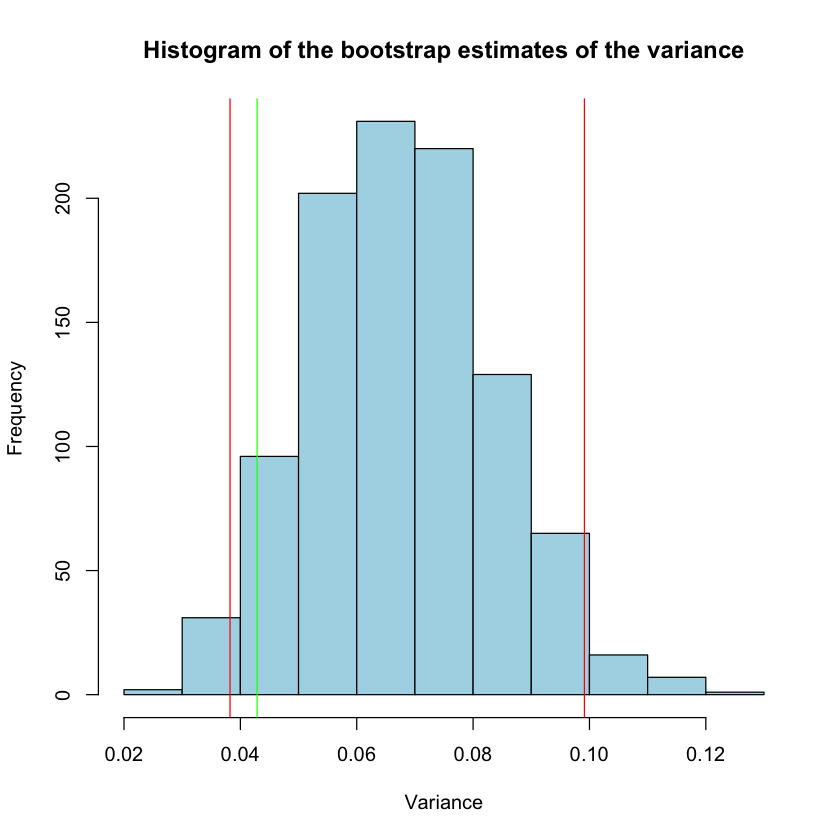

In [64]:
hist(varboot$thetastar, main = "Histogram of the bootstrap estimates of the variance", xlab = "Variance", ylab = "Frequency", col = "lightblue")
abline(v = CI_left, col = "red")
abline(v = CI_right, col = "red")

abline(v = CI_chi_left, col = "green")
abline(v = CI_chi_right, col = "green")

In [45]:
var(varboot$thetastar)

[1] 0.0002530588

In [59]:
cat('variance of the bootstrap estimates is greater than the CI_left:', var(varboot$thetastar) < CI_left)
cat('\nvariance of the bootstrap estimates is greater than the CI_right:', var(varboot$thetastar) < CI_right)


variance of the bootstrap estimates is greater than the CI_left: TRUE
variance of the bootstrap estimates is greater than the CI_right: TRUE